## __OVERVIEW:__
The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers.

## __GOAL:__
The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.
For each in the test set, we must predict a 0 or 1 value for the variable.

In [1]:
### Importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

### Getting the dataset

In [2]:
df=pd.read_csv('Telco_Customer_Churn_Dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data preprocessing

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### Checking for missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Checking for duplicate values

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The 'TotalcCharges' column actually contains numeric value but the datatype of that column appears to be 'object'

##### Converting 'TotalCharges' column to numeric datatype

When we try to convert this column to numeric datatype, we get the error 'ValueError: Unable to parse string " "'

This means that we have an empty string " ", which cannot be converted to numeric. So, we replace " " to NaN value

In [8]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [9]:
# 'TotalCharges' column converted to numeric
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that the " " was present in 11 rows in the dataset

Now, we have to impute these 11 missing values. Before imputation, we have to check the presence of outliers in order to decide if the imputation can be done with mean or median

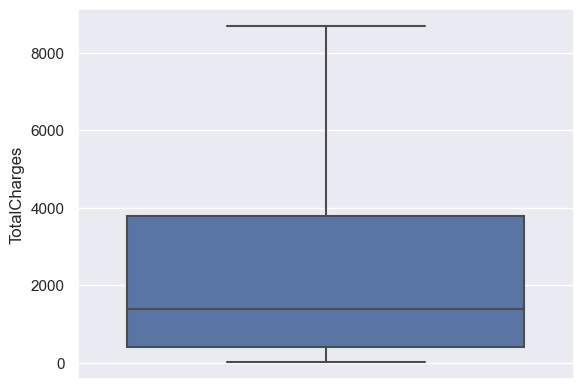

In [11]:
sns.boxplot(y=df['TotalCharges'],data=df)
plt.show()

There are no outliers in this dataset. So, we can impute the missing values using mean

In [12]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
# Checking if the 'TotalCharges' column contains any other null values
df['TotalCharges'].isnull().sum()

0

### Encoding

In [14]:
df_model=df.copy()

##### Checking the no of unique values in each column

In [15]:
for i in df_model.columns:
    print(f'No of unique values in column {i} is : {df_model[i].nunique()}')

No of unique values in column customerID is : 7043
No of unique values in column gender is : 2
No of unique values in column SeniorCitizen is : 2
No of unique values in column Partner is : 2
No of unique values in column Dependents is : 2
No of unique values in column tenure is : 73
No of unique values in column PhoneService is : 2
No of unique values in column MultipleLines is : 3
No of unique values in column InternetService is : 3
No of unique values in column OnlineSecurity is : 3
No of unique values in column OnlineBackup is : 3
No of unique values in column DeviceProtection is : 3
No of unique values in column TechSupport is : 3
No of unique values in column StreamingTV is : 3
No of unique values in column StreamingMovies is : 3
No of unique values in column Contract is : 3
No of unique values in column PaperlessBilling is : 2
No of unique values in column PaymentMethod is : 4
No of unique values in column MonthlyCharges is : 1585
No of unique values in column TotalCharges is : 6

##### Checking the unique values in each column

In [16]:
for i in df_model.columns:
    print(f'The unique values in column {i} is : {df_model[i].unique()}\n')

The unique values in column customerID is : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

The unique values in column gender is : ['Female' 'Male']

The unique values in column SeniorCitizen is : [0 1]

The unique values in column Partner is : ['Yes' 'No']

The unique values in column Dependents is : ['No' 'Yes']

The unique values in column tenure is : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

The unique values in column PhoneService is : ['No' 'Yes']

The unique values in column MultipleLines is : ['No phone service' 'No' 'Yes']

The unique values in column InternetService is : ['DSL' 'Fiber optic' 'No']

The unique values in column OnlineSecurity is : ['No' 'Yes' 'No internet service']

The unique values in column OnlineBackup is : ['Yes' 'No' 'No internet service

##### Checking the no of customers churning out

In [17]:
print('No of customers churning out : ',df_model[df_model['Churn']=='Yes']['Churn'].count())

No of customers churning out :  1869


In [18]:
# Percentage of customers churning out
df_model['Churn'].value_counts()*100/len(df_model)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Converting the values of the dependent variable into numeric

In [19]:
df_model['Churn']=np.where(df_model['Churn']=='Yes',1,0)

In [20]:
df_model

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Seggregating the dependent and independent variables

In [21]:
# We know that the customerID column is not significant. So, we need not include it in the independent variables
x=df_model.iloc[:,1:-1]
y=df_model.iloc[:,-1]

In [22]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [23]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

The categorical columns are converted to numeric columns using One hot encoding

In [24]:
x = pd.get_dummies(df_model, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                      'PaperlessBilling', 'PaymentMethod'], dtype=int, drop_first=True)

In [25]:
x

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [26]:
x.drop(['customerID','Churn'], axis=1, inplace=True)

In [27]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


For those columns with the numerical values in a wide range, we do feature scaling

### EDA

In [29]:
df_eda=df.copy()
df_eda.drop('customerID',axis=1,inplace=True)

In [30]:
df_eda

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Univariate analysis

##### Churn rate visualization

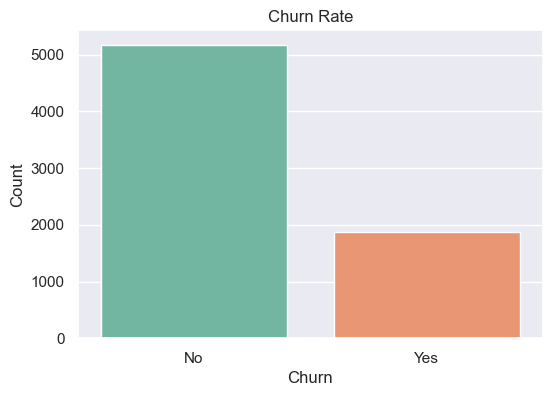

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_eda, palette='Set2')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

##### Gender distribution

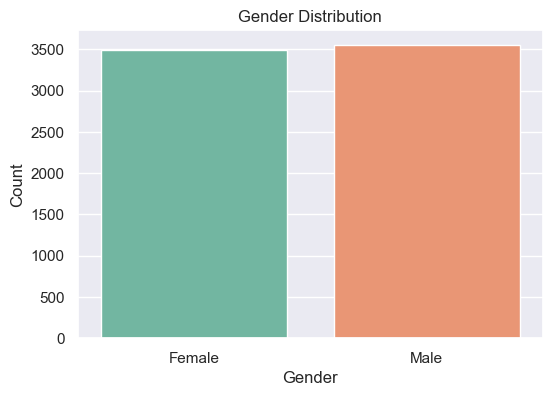

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_eda, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Senior Citizen distribution

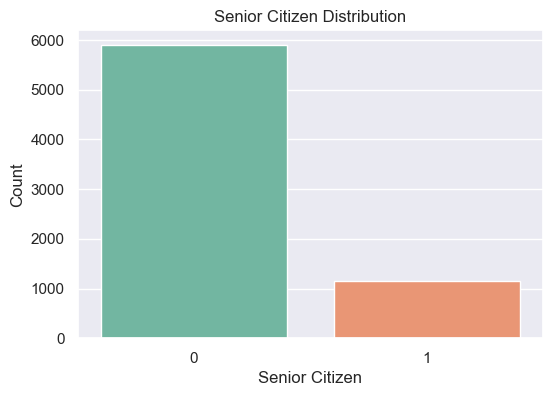

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', data=df_eda, palette='Set2')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

##### Tenure distribution

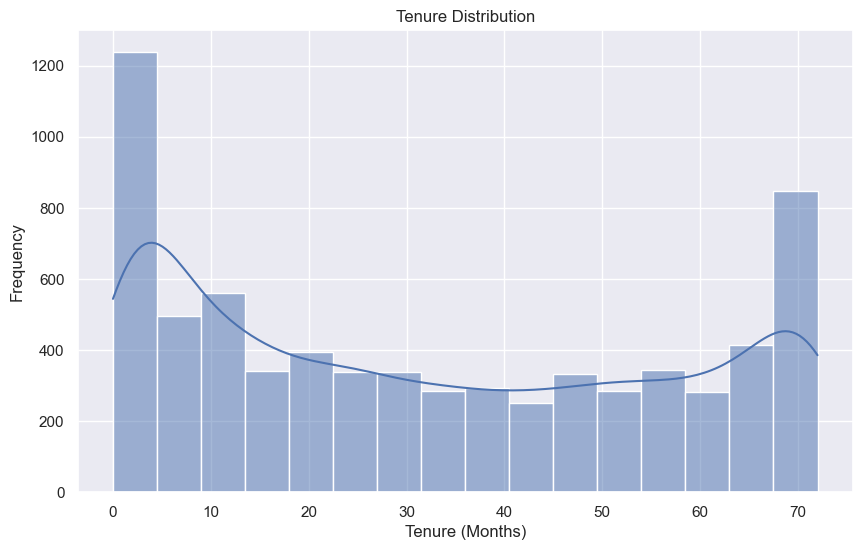

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

##### Monthly Charges distribution

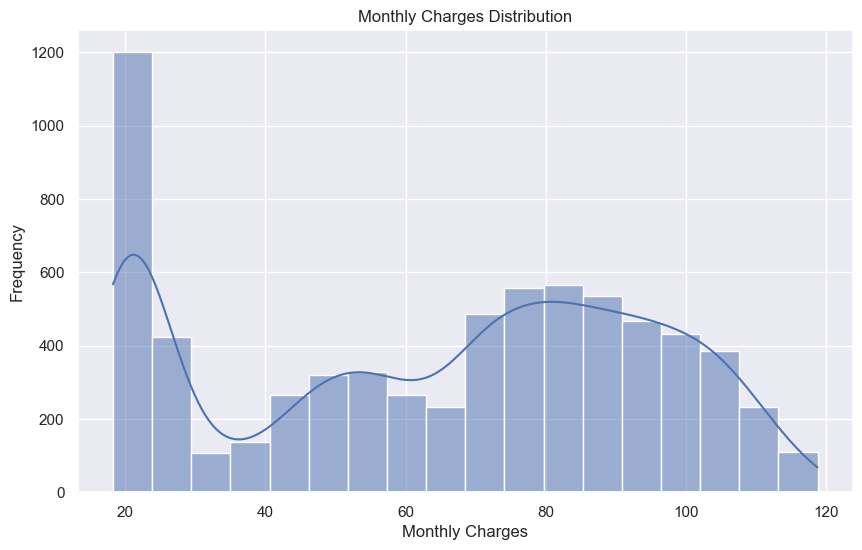

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

##### Total Charges distribution

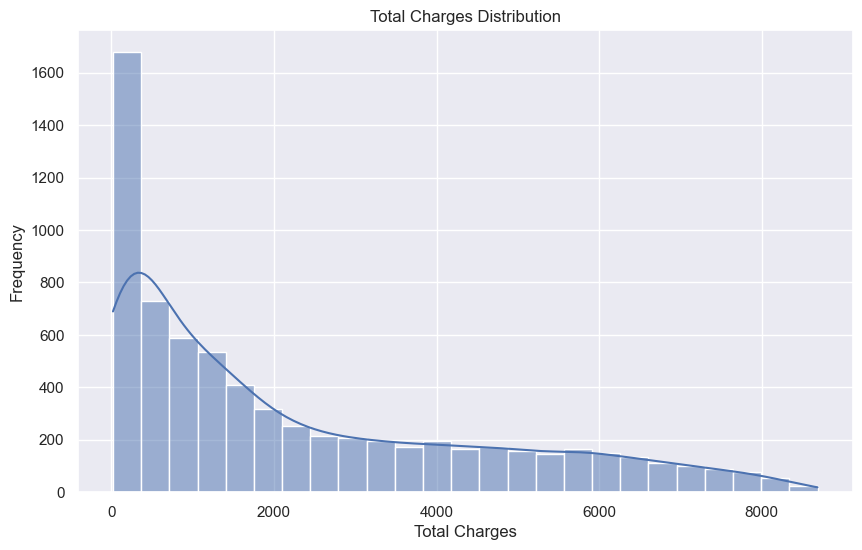

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

#### Multivariate analysis

##### Churn vs Contract Type

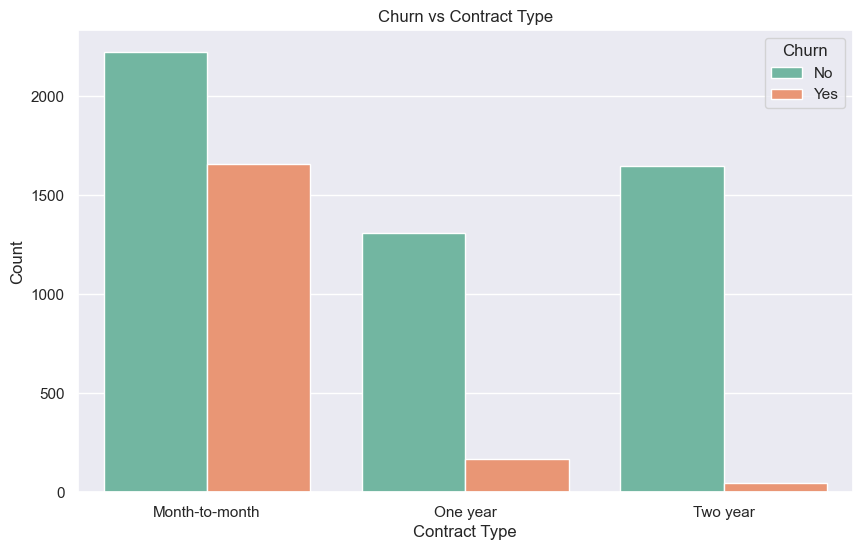

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn vs Payment Method

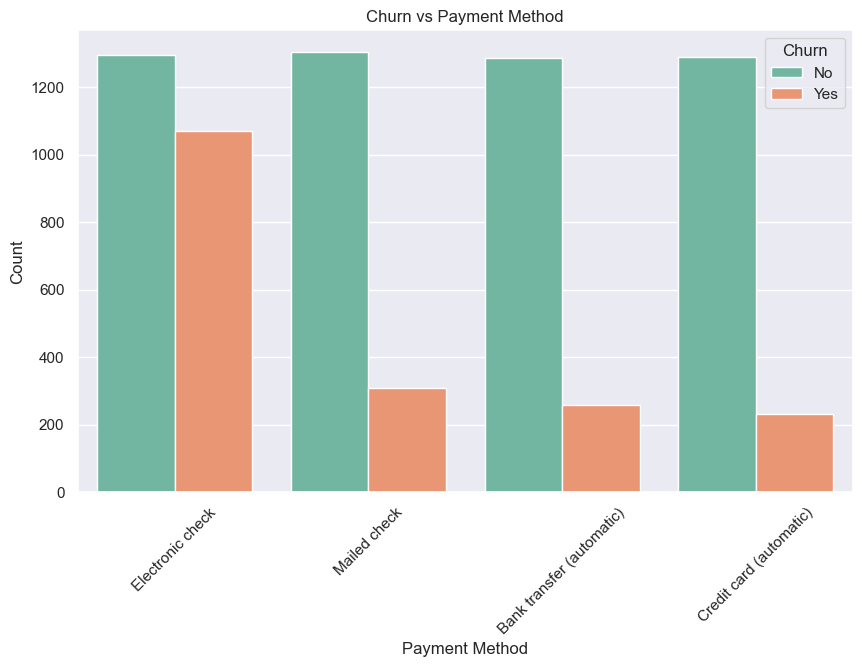

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

##### Tenure vs Churn

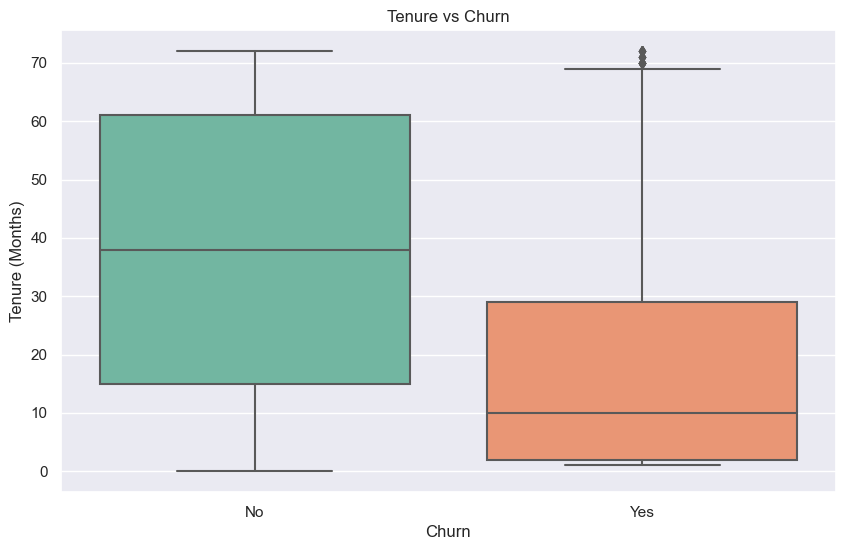

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_eda, palette='Set2')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

##### Churn vs Internet Service

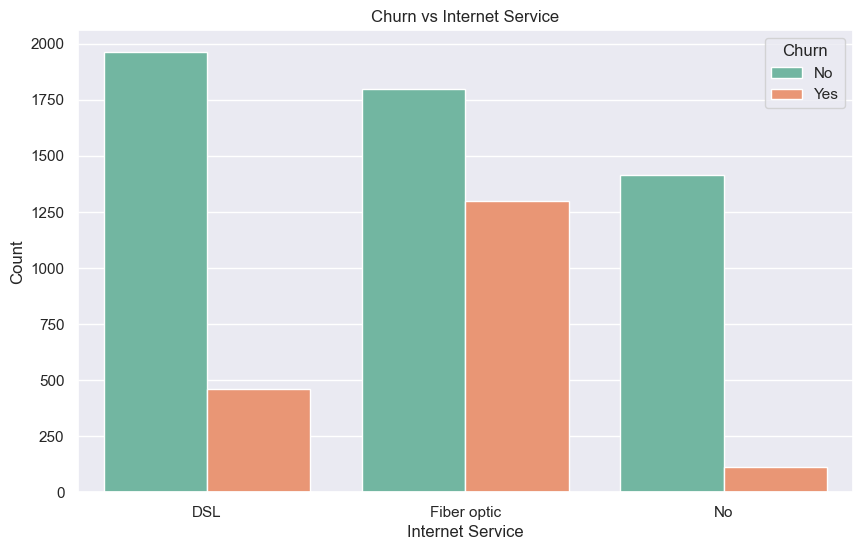

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn vs Online Security

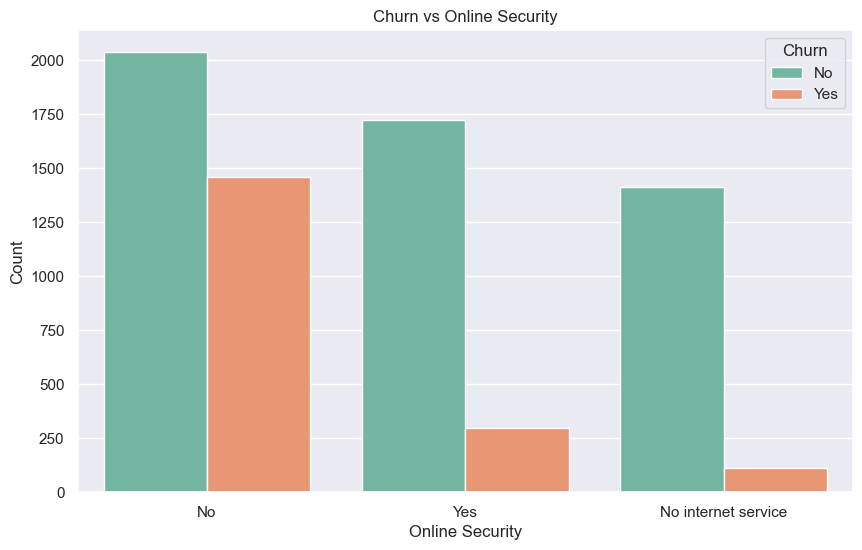

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn vs Tech Support

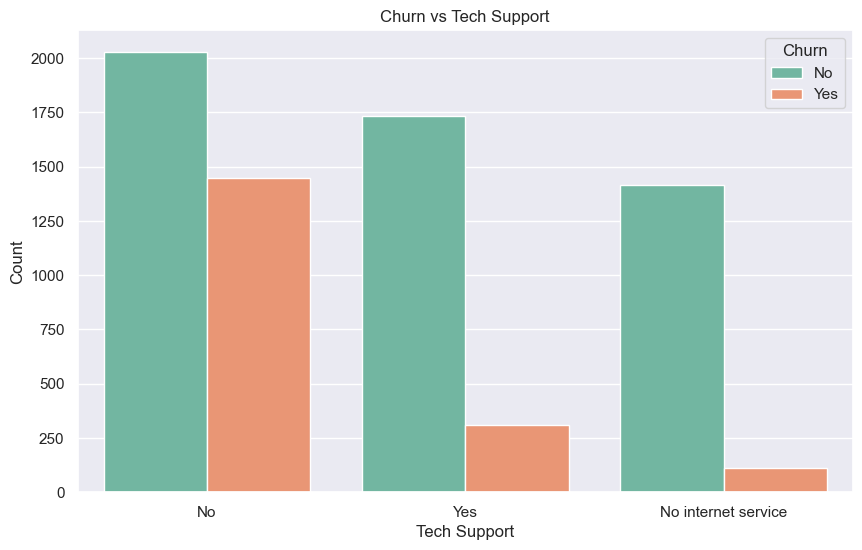

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn vs Senior Citizen

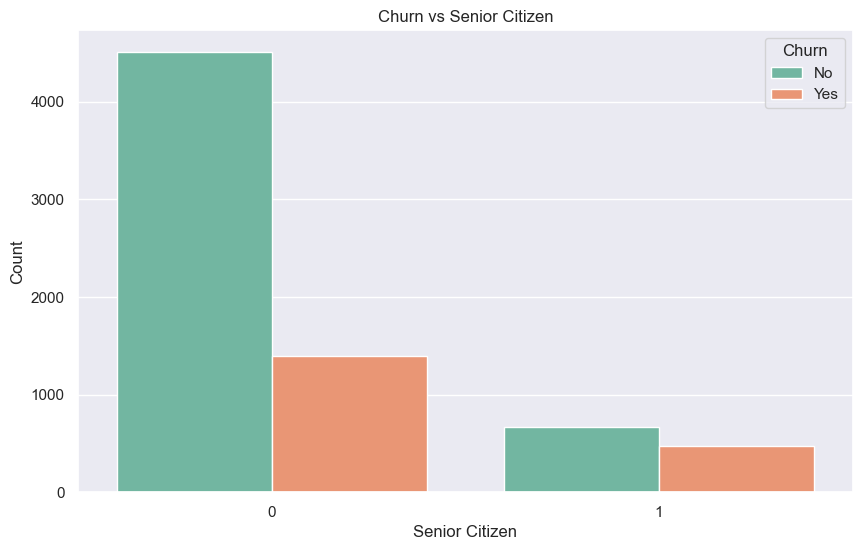

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn vs Gender

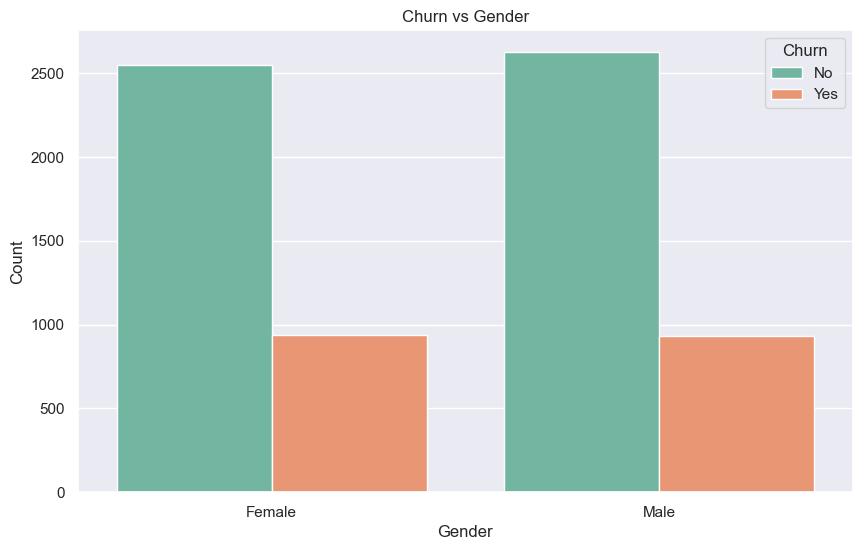

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn rate by tenure groups

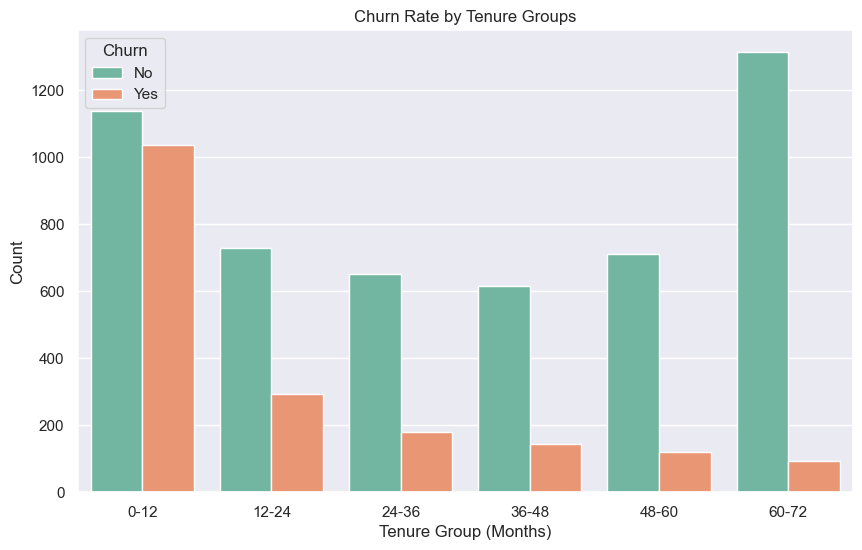

In [45]:
df_eda['tenure_group'] = pd.cut(df_eda['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_group', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn Rate by Tenure Groups')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn rate by Monthly Charges groups

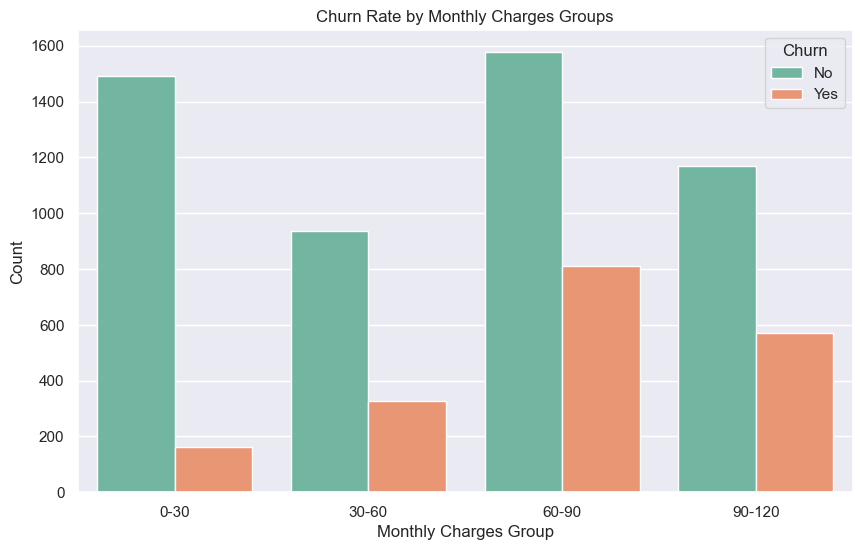

In [46]:
df_eda['MonthlyCharges_group'] = pd.cut(df_eda['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
plt.figure(figsize=(10, 6))
sns.countplot(x='MonthlyCharges_group', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn Rate by Monthly Charges Groups')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Churn rate by Total Charges groups

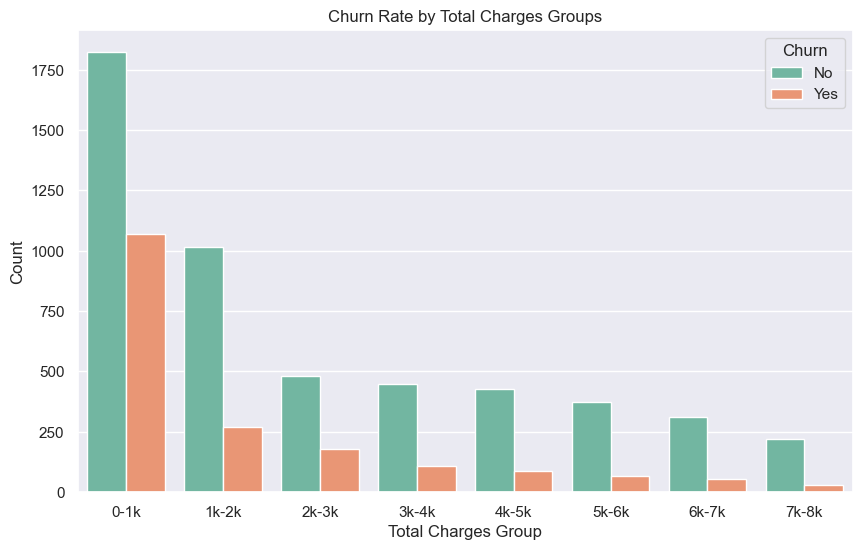

In [47]:
df_eda['TotalCharges_group'] = pd.cut(df_eda['TotalCharges'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], labels=['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k'])
plt.figure(figsize=(10, 6))
sns.countplot(x='TotalCharges_group', hue='Churn', data=df_eda, palette='Set2')
plt.title('Churn Rate by Total Charges Groups')
plt.xlabel('Total Charges Group')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

##### Pair plot

<Figure size 1400x800 with 0 Axes>

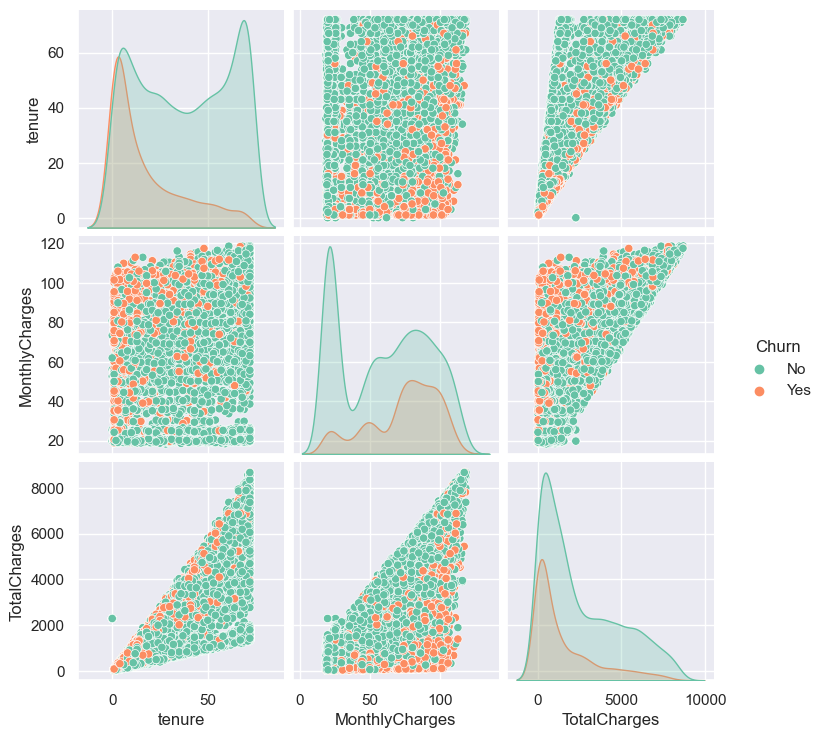

In [48]:
plt.figure(figsize=(14, 8))
sns.pairplot(df_eda[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set2')
plt.show()

### Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=39)

In [30]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


#### Importing the libraries required for classification algorithms

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#### Function for model building

In [32]:
num=1
acc_all_models=pd.DataFrame(columns=['Train_accuracy','Test_accuracy'])

def model_building(model):
    global num
    print(f'Model-{num} : {model}\n')
    mdl=model.fit(x_train,y_train)
    mdl_pred_train=mdl.predict(x_train)
    mdl_pred_test=mdl.predict(x_test)

    # Confusion matrix
    train_conf=confusion_matrix(y_train,mdl_pred_train)
    print('Training confusion matrix : \n',train_conf)
    test_conf=confusion_matrix(y_test,mdl_pred_test)
    print('\nTesting confusion matrix : \n',test_conf)
    print()

    # Classification report
    train_class_report=classification_report(y_train,mdl_pred_train)
    print('Training classification report : \n',train_class_report)
    test_class_report=classification_report(y_test,mdl_pred_test)
    print('Testing classification report : \n',test_class_report)
    print()

    # Accuracy score
    train_acc=accuracy_score(y_train,mdl_pred_train)
    print('Training accuracy score : \n',train_acc)
    test_acc=accuracy_score(y_test,mdl_pred_test)
    print('\nTesting accuracy score : \n',test_acc)
    print()

    num+=1

    res=pd.DataFrame({'Training accuracy_score':[train_acc],'Testing accuracy_score':[test_acc]})
    global acc_all_models
    acc_all_models=pd.concat([acc_all_models,res],ignore_index=True)

In [33]:
model_building(LogisticRegression())

Model-1 : LogisticRegression()

Training confusion matrix : 
 [[3734  405]
 [ 674  821]]

Testing confusion matrix : 
 [[915 120]
 [158 216]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.67      0.55      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Training accuracy score : 
 0.8084842030528931

Testing accuracy score : 
 0.8026969481902059



In [34]:
model_building(DecisionTreeClassifier())

Model-2 : DecisionTreeClassifier()

Training confusion matrix : 
 [[4137    2]
 [  12 1483]]

Testing confusion matrix : 
 [[815 220]
 [193 181]]

Training classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1035
           1       0.45      0.48      0.47       374

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.71      0.71      0.71      1409


Training accuracy score : 
 0.997515086971956

Testing accuracy score : 
 0.7068843151171044



In [35]:
model_building(RandomForestClassifier())

Model-3 : RandomForestClassifier()

Training confusion matrix : 
 [[4133    6]
 [   8 1487]]

Testing confusion matrix : 
 [[925 110]
 [182 192]]

Training classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Training accuracy score : 
 0.997515086971956

Testing accuracy score : 
 0.7927608232789212



In [36]:
model_building(XGBClassifier())

Model-4 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training confusion matrix : 
 [[4015  124]
 [ 227 1268]]

Testing confusion matrix : 
 [[892 143]
 [167 207]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.95      0

In [37]:
model_building(SVC())

Model-5 : SVC()

Training confusion matrix : 
 [[4139    0]
 [1495    0]]

Testing confusion matrix : 
 [[1035    0]
 [ 374    0]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      4139
           1       0.00      0.00      0.00      1495

    accuracy                           0.73      5634
   macro avg       0.37      0.50      0.42      5634
weighted avg       0.54      0.73      0.62      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409


Training accuracy score : 
 0.7346467873624423

Testing accuracy score : 
 0.7345635202271115



In [38]:
model_building(KNeighborsClassifier())

Model-6 : KNeighborsClassifier()

Training confusion matrix : 
 [[3832  307]
 [ 643  852]]

Testing confusion matrix : 
 [[894 141]
 [207 167]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4139
           1       0.74      0.57      0.64      1495

    accuracy                           0.83      5634
   macro avg       0.80      0.75      0.77      5634
weighted avg       0.82      0.83      0.82      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1035
           1       0.54      0.45      0.49       374

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.66      1409
weighted avg       0.74      0.75      0.74      1409


Training accuracy score : 
 0.8313809016684416

Testing accuracy score : 
 0.7530163236337828



In [39]:
model_building(BernoulliNB())

Model-7 : BernoulliNB()

Training confusion matrix : 
 [[2839 1300]
 [ 304 1191]]

Testing confusion matrix : 
 [[687 348]
 [ 69 305]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      4139
           1       0.48      0.80      0.60      1495

    accuracy                           0.72      5634
   macro avg       0.69      0.74      0.69      5634
weighted avg       0.79      0.72      0.73      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.91      0.66      0.77      1035
           1       0.47      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.70      0.72      1409


Training accuracy score : 
 0.7152999645012424

Testing accuracy score : 
 0.7040454222853088



##### Stacking model

In [40]:
estimator_models_stack=[('Logistic_regression',LogisticRegression()),
                        ('Support_Vector_Machine',SVC()),
                        ('KNN',KNeighborsClassifier()),
                        ('Naive_Bayes',BernoulliNB())]

stack_model=StackingClassifier(estimators=estimator_models_stack,final_estimator=KNeighborsClassifier(),
                              cv=10,n_jobs=-1)
stack_model.fit(x_train,y_train)
stack_model_pred_train=stack_model.predict(x_train)
stack_model_pred_test=stack_model.predict(x_test)

print('Training confusion matrix : \n',confusion_matrix(y_train,stack_model_pred_train))
print('\nTesting confusion matrix : \n',confusion_matrix(y_test,stack_model_pred_test))
print()

print('Training classification report : \n',classification_report(y_train,stack_model_pred_train))
print('Testing classification report : \n',classification_report(y_test,stack_model_pred_test))
print()

print('Training accuracy score : \n',accuracy_score(y_train,stack_model_pred_train))
print('\nTesting accuracy score : \n',accuracy_score(y_test,stack_model_pred_test))
print()

Training confusion matrix : 
 [[3699  440]
 [ 670  825]]

Testing confusion matrix : 
 [[894 141]
 [195 179]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4139
           1       0.65      0.55      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.48      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409


Training accuracy score : 
 0.8029818956336529

Testing accuracy score : 
 0.7615330021291696



##### Voting model

In [41]:
estimator_models_vote=[('Logistic_regression',LogisticRegression()),
                       ('Decision_tree',DecisionTreeClassifier()),
                       ('Random_forest',RandomForestClassifier()),
                       ('XGboost',XGBClassifier()),
                       ('Support_Vector_Machine',SVC()),
                       ('KNN',KNeighborsClassifier()),
                       ('Naive_Bayes',BernoulliNB())]

vote_model=VotingClassifier(estimators=estimator_models_vote)
vote_model.fit(x_train,y_train)
vote_model_pred_train=vote_model.predict(x_train)
vote_model_pred_test=vote_model.predict(x_test)

print('Training confusion matrix : \n',confusion_matrix(y_train,vote_model_pred_train))
print('\nTesting confusion matrix : \n',confusion_matrix(y_test,vote_model_pred_test))
print()

print('Training classification report : \n',classification_report(y_train,vote_model_pred_train))
print('Testing classification report : \n',classification_report(y_test,vote_model_pred_test))
print()

print('Training accuracy score : \n',accuracy_score(y_train,vote_model_pred_train))
print('\nTesting accuracy score : \n',accuracy_score(y_test,vote_model_pred_test))
print()

model_names=['Logistic_regression','Decision_tree','Random_forest','XGboost','Support_Vector_Machine','KNN','Naive_Bayes']
acc_all_models.index=model_names
acc_all_models.drop(['Train_accuracy','Test_accuracy'],axis=1,inplace=True)
acc_all_models

Training confusion matrix : 
 [[4075   64]
 [ 289 1206]]

Testing confusion matrix : 
 [[919 116]
 [171 203]]

Training classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      4139
           1       0.95      0.81      0.87      1495

    accuracy                           0.94      5634
   macro avg       0.94      0.90      0.92      5634
weighted avg       0.94      0.94      0.94      5634

Testing classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Training accuracy score : 
 0.9373446929357473

Testing accuracy score : 
 0.7963094393186657



,Training accuracy_score,Testing accuracy_score
Logistic_regression,0.808484,0.802697
Decision_tree,0.997515,0.706884
Random_forest,0.997515,0.792761
XGboost,0.937700,0.779986
Support_Vector_Machine,0.734647,0.734564
KNN,0.831381,0.753016
Naive_Bayes,0.715300,0.704045
